# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

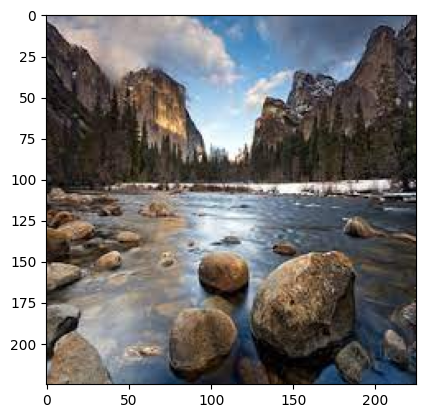

In [2]:
img = cv2.cvtColor(cv2.imread("../data/Landscape.jpg"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

In [3]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.copy(out)
    t = np.copy(out)
    # draw circle
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    #mask = shapes.astype(bool)
    t = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)

    # plt.imshow(t)
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    #t = color.rgb2lab(t)
    #return np.sum(color.deltaE_cie76(t, img))
    return np.sum(np.abs(np.subtract(img, t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.3], out, img) #X,Y,r,R,G,B,alpha

15181995

In [4]:
def draw_circle(vec, out, p = False):
    shapes = np.copy(out)
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (int(vec[3]), int(vec[4]), int(vec[5])), cv2.FILLED)
    #mask = shapes.astype(bool)
    #out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]
    out = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)
    if p:
        plt.imshow(out)
        plt.show()
    return out

In [5]:
h, w, c = img.shape

bounds = [
    [0, w],             # X
    [0, h],             # Y
    [5, (w + h)//4],    # radius
    [0, 255],           # R
    [0, 255],           # G
    [0, 255],           # B
    [0.3, 1],           # alpha
]

nIter, cR, popSize = 300, 0.75, 50

# Our Differential Evolution

In [6]:
from differential_evolution import differential_evolution

0 {'P': array([ 96.65368743,   0.        ,  72.33320306, 120.33523918,
       196.84865981, 243.58489809,   0.60679304]), 'nIt': 248, 'fun': 13353682, 'nFev': 24900}


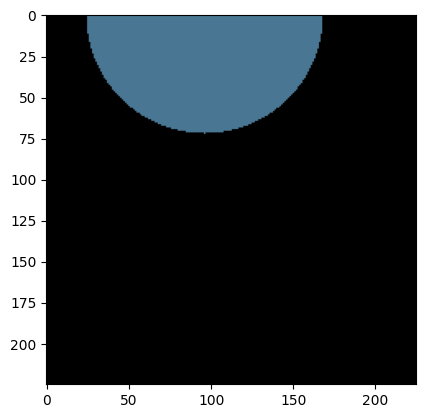

30 {'P': array([179.85522546,  31.17131658,   9.93556175,  94.73736139,
       117.43961908, 144.63614481,   0.99987945]), 'nIt': 500, 'fun': 7657910, 'nFev': 50100}


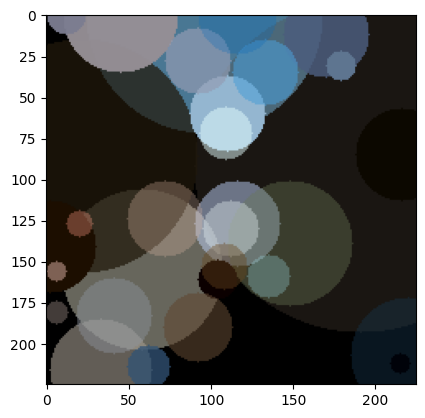

60 {'P': array([112.91921871, 139.85762647,   5.18030529,  60.90657789,
        67.63297538,  70.8065323 ,   1.        ]), 'nIt': 330, 'fun': 6952459, 'nFev': 33100}


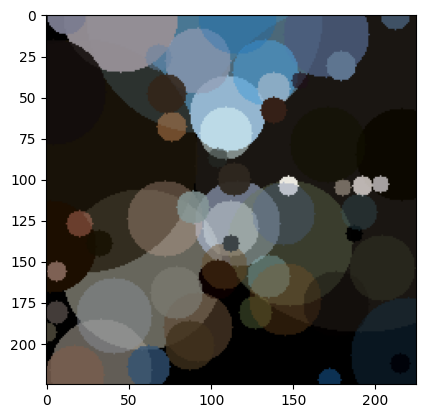

90 {'P': array([204.37018252,  25.87586036,   9.45339106,  85.27582579,
        79.94395216,  85.16981105,   0.31097401]), 'nIt': 345, 'fun': 6514094, 'nFev': 34600}


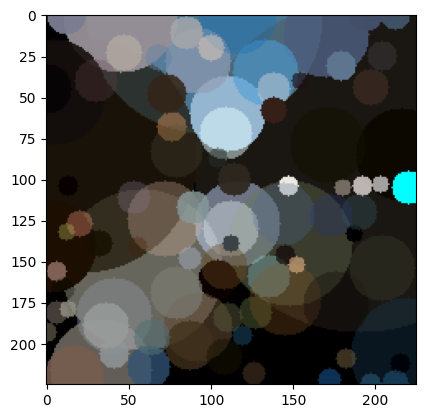

120 {'P': array([ 27.03156322, 160.28429525,  10.6272834 , 109.58176729,
       100.43333565, 104.18240822,   0.3786122 ]), 'nIt': 336, 'fun': 6227176, 'nFev': 33700}


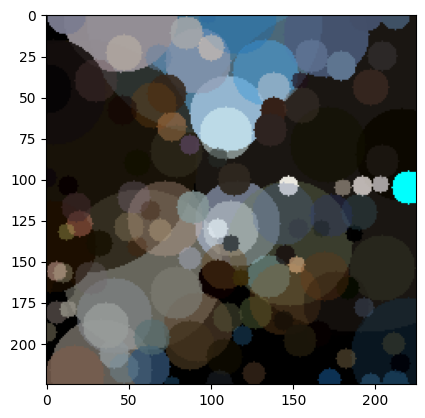

150 {'P': array([123.91196663, 208.40748929,   6.89350698,  30.55250424,
        51.5830872 ,  88.13949605,   0.37136466]), 'nIt': 423, 'fun': 5984705, 'nFev': 42400}


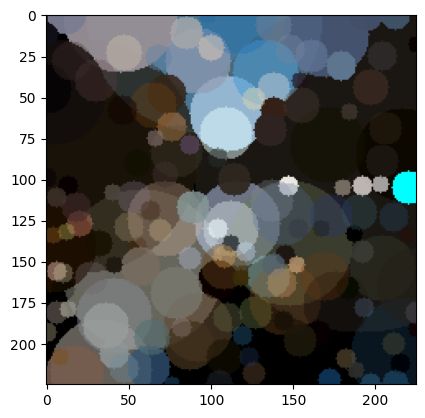

180 {'P': array([115.26731439,  46.55766292,  17.14772627, 164.9490239 ,
       189.86892461, 210.41565912,   0.30079046]), 'nIt': 446, 'fun': 5793406, 'nFev': 44700}


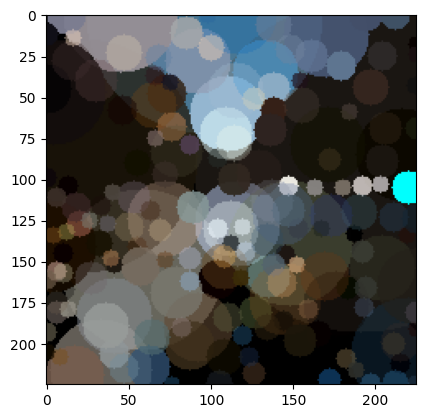

210 {'P': array([179.62609514, 177.52981086,   5.70829751,  21.29819757,
         6.52274511,   0.        ,   0.54385202]), 'nIt': 453, 'fun': 5642832, 'nFev': 45400}


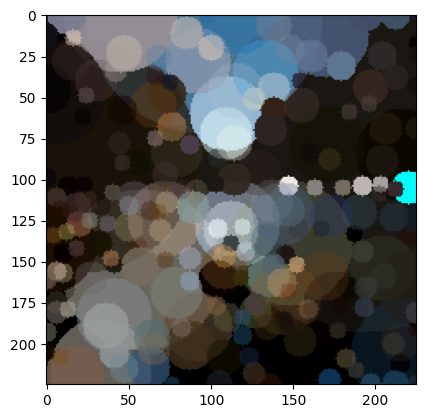

240 {'P': array([ 25.84708626,  15.43211266,   6.21331685, 201.55295342,
       177.12968891, 167.32622145,   0.54997494]), 'nIt': 500, 'fun': 5497712, 'nFev': 50100}


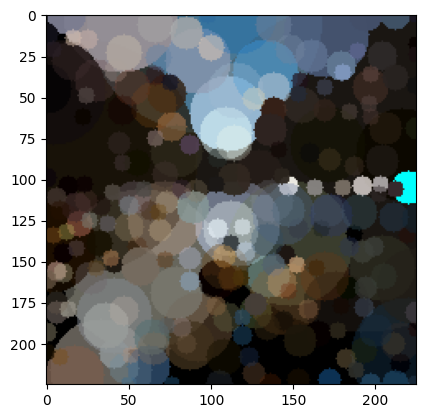

270 {'P': array([ 42.24817084, 117.61418086,   5.31779084,  49.08980018,
         0.32258535,   3.36041189,   0.30144841]), 'nIt': 160, 'fun': 5391476, 'nFev': 16100}


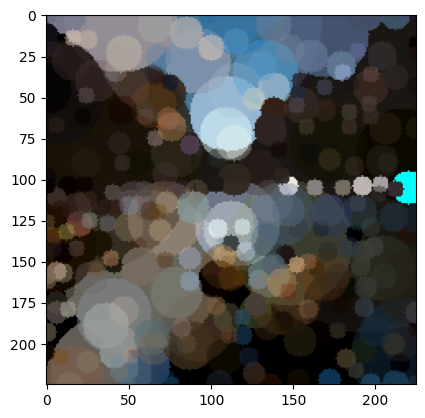

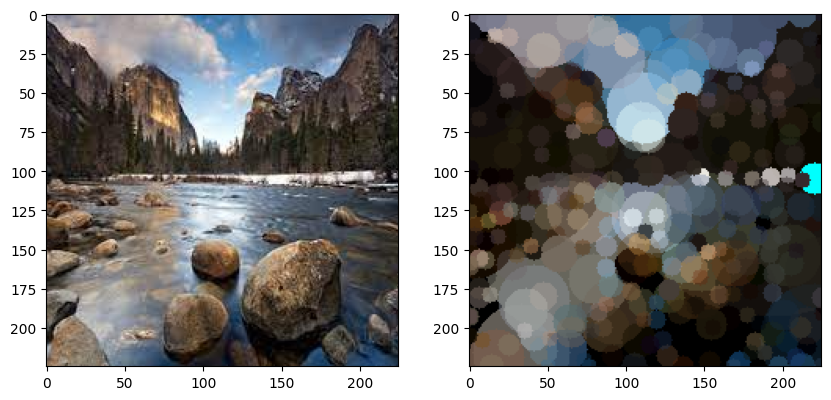

In [7]:
data = np.zeros((nIter, len(bounds)))
out = np.zeros_like(img)
lastFitness = 100000000
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=popSize, cR = cR, nMax = 500) #The smaller cR is, it takes less risks
    if r['fun'] > lastFitness: continue
    if True: data[i] = r["P"]
    if i % (nIter // np.min((nIter, 10))): 
        out = draw_circle(r["P"], out)
    else:
        print(i, r)
        out = draw_circle(r["P"], out, True)
    lastFitness = r['fun']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(out) 

# Scipy Differential Evolution

In [8]:
from scipy.optimize import differential_evolution

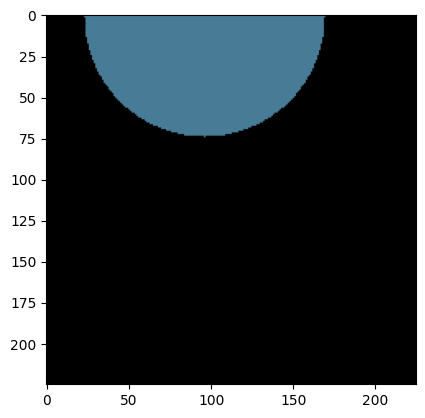

0      fun: 13368511.0
 message: 'Optimization terminated successfully.'
    nfev: 20308
     nit: 28
 success: True
       x: array([ 96.37902739,   1.30624948,  73.26611836,  92.78854162,
       161.01124643, 195.93463609,   0.76667478])


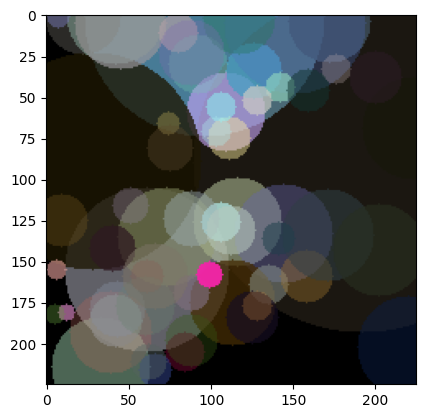

60      fun: 7993947.0
 message: 'Optimization terminated successfully.'
    nfev: 4908
     nit: 6
 success: True
       x: array([  9.54144985, 125.96466154,  16.29546477, 127.35399733,
        96.86541941,  33.80597996,   0.30849888])


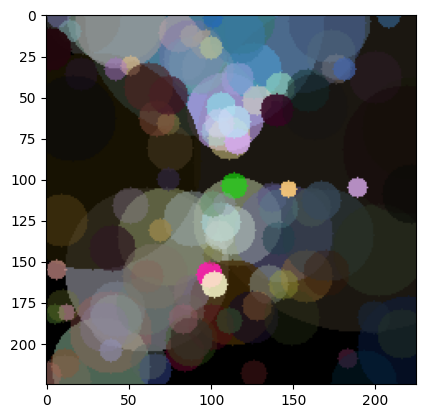

120      fun: 7394444.0
 message: 'Optimization terminated successfully.'
    nfev: 6308
     nit: 8
 success: True
       x: array([167.77534053, 113.16828896,  12.38337792,  55.47512405,
        72.71451153,  90.32418354,   0.7284261 ])


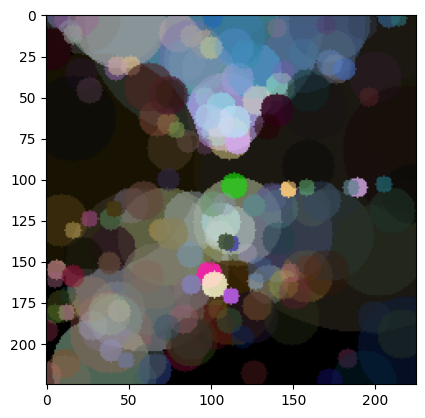

180      fun: 7061458.0
 message: 'Optimization terminated successfully.'
    nfev: 5608
     nit: 7
 success: True
       x: array([109.71899933, 138.93602991,   5.24393512,  65.44966749,
        81.88266466,  53.65126144,   0.88930289])


KeyboardInterrupt: 

In [9]:
out = np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img), recombination = cR, popsize= popSize)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // np.min((nIter, 5))): out = draw_circle(res.x, out)
    else:
        out = draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)

### Make Animation

In [ ]:
import matplotlib.animation as animation
from IPython import display
import time

fig = plt.figure()

def animate(frame_number):
    global imageToAnimate
    imageToAnimate = draw_circle(data[frame_number], imageToAnimate)
    plt.imshow(imageToAnimate)

if True:
    global imageToAnimate
    imageToAnimate = np.zeros(img.shape, np.uint8)
    plt.imshow(imageToAnimate)
    anim = animation.FuncAnimation(fig, animate, frames=data.shape[0], interval=5)

    f = str(int(time.time())) + ".gif"
    writervideo = animation.PillowWriter(fps=60)
    anim.save(f, writer=writervideo)